In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
#loading all the datasets
test_df= pd.read_csv('Housing_dataset_test.csv')
train_df= pd.read_csv('Housing_dataset_train.csv')
sample_df= pd.read_csv('Sample_submission.csv')

#displaying the dataframes
display(test_df.head(2))
display(train_df.head(2))
display(sample_df.head(2))

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4


,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689


,ID
0,845
1,1924


## basic analysis of train and test dataframe


In [3]:
#viewing both dataframes
test_df.shape

(6000, 6)

In [4]:
train_df.shape

(14000, 7)

In [6]:
train_df.isna().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [21]:
train_df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [27]:
loc_dpd= train_df.dropna(subset=['loc', 'bedroom'], how = 'all')
display(loc_dpd.isna().sum())
loc_dpd.shape

ID                  0
loc              1758
title            1718
bedroom          1744
bathroom         1799
parking_space    1809
price               0
dtype: int64

(13945, 7)

In [ ]:
bed_dpd= train_df.dropna(subset=['bedroom'])
bed_dpd.

In [16]:
train_df.shape

(5689, 7)

In [17]:
train_df.isna().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

## cleaning the train dataset and exploring

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


## Univariate visualizations

In [23]:
train_df['loc'].sort_values().unique()

array(['Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa',
       'Benue', 'Borno', 'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti',
       'Enugu', 'Gombe', 'Imo', 'Jigawa', 'Kaduna', 'Kano', 'Katsina',
       'Kebbi', 'Kogi', 'Kwara', 'Lagos', 'Nasarawa', 'Niger', 'Ogun',
       'Ondo', 'Osun', 'Oyo', 'Plateau', 'Rivers', 'Sokoto', 'Taraba',
       'Yobe', 'Zamfara', nan], dtype=object)

<AxesSubplot:xlabel='count', ylabel='loc'>

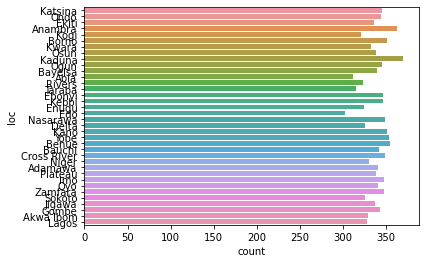

In [28]:
sns.countplot(y='loc', data= train_df)

In [29]:
train_df.title.value_counts()

Flat                    1372
Apartment               1331
Townhouse               1327
Mansion                 1322
Detached duplex         1312
Penthouse               1306
Semi-detached duplex    1299
Bungalow                1293
Terrace duplex          1266
Cottage                  450
Name: title, dtype: int64

In [36]:
train_df.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [42]:
sns.countplot(y= 'bedroom', x='title', data= train_df)

ValueError: Cannot pass values for both `x` and `y`